<a href="https://colab.research.google.com/github/vkmuneer/fdp2021/blob/main/X_Ray_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize
from pandas import DataFrame

In [3]:
import keras
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

In [4]:
from PIL import Image
from skimage import io
X=[]
Y=[]
base_path='/content/gdrive/MyDrive/Sharing folder/new'
source_path=base_path
for child in os.listdir(source_path):
  print(child)
  sub_path = os.path.join(source_path, child)
  bsub_path = os.path.join(base_path, child)
  if os.path.isdir(sub_path):
    for data_file in os.listdir(sub_path):
      Qry = Image.open(os.path.join(sub_path, data_file))
      Qry = Qry.convert("RGB")
      Qry = np.array(Qry.resize((224,224)))
      Qry = Qry.reshape([224,224,3])
      Qry = Qry[:,:,2]
      flist=np.array(Qry)
      X.append(flist)
      Y.append(child)

PNEUMONIA
NORMAL
Covid


In [5]:
images_arr = np.asarray(X)
images_arr = images_arr.astype('float32')
images_arr.shape

(817, 224, 224)

In [6]:
images_arr = images_arr.reshape(-1, 224,224, 1)
images_arr = images_arr / np.max(images_arr)

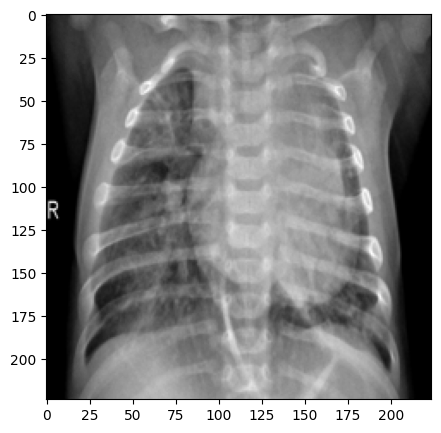

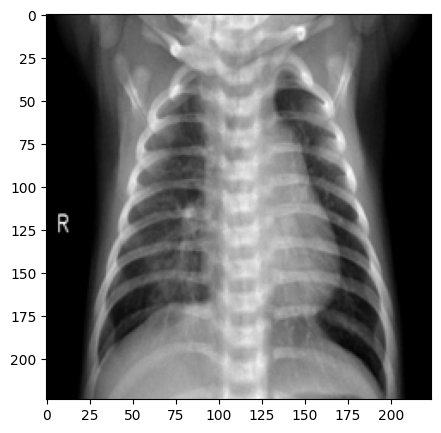

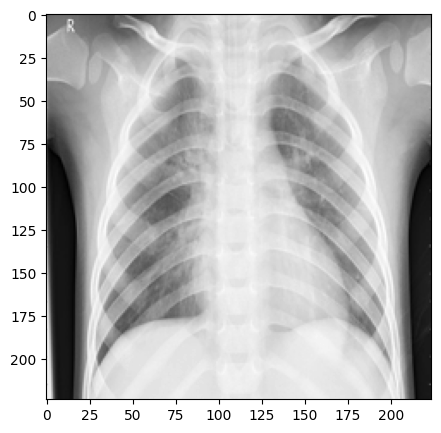

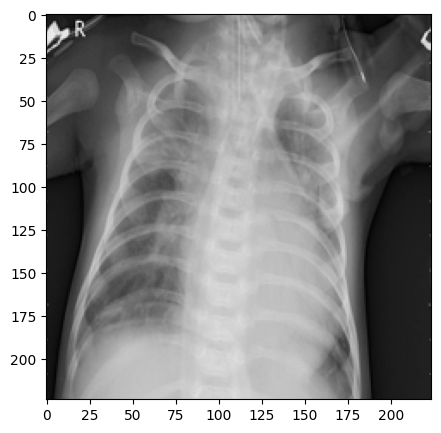

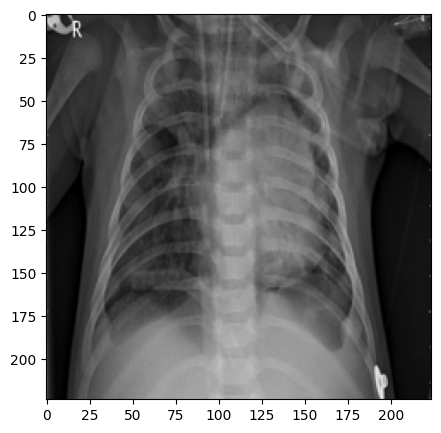

In [7]:
# Display the first two images in training data
for i in range(5):
  plt.figure(figsize = [5,5])
  curr_img = np.reshape(images_arr[i], (224,224))
  plt.imshow(curr_img, cmap='gray')
  plt.show()

In [8]:
from sklearn.preprocessing import LabelBinarizer
labelBinarizer = LabelBinarizer()
y=labelBinarizer.fit_transform(Y)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(images_arr,y,test_size=0.2,random_state =42,stratify=y)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten

In [11]:
cnnModel= Sequential()
cnnModel.add(Conv2D(64, (5,5) , padding = 'same', activation="relu", input_shape=(224,224,1)))
cnnModel.add(Conv2D(64, (5,5) , padding = 'same', activation="relu"))
cnnModel.add(Conv2D(64, (5,5) , padding = 'same', activation="relu"))
cnnModel.add(MaxPooling2D((2,2)))
cnnModel.add(Conv2D(128, (5,5) , padding = 'same', activation="relu"))
cnnModel.add(Conv2D(128, (5,5) , padding = 'same', activation="relu"))
cnnModel.add(MaxPooling2D((2,2)))
cnnModel.add(Conv2D(128, (5,5) , padding = 'same', activation="relu"))
cnnModel.add(Conv2D(128, (5,5) , padding = 'same', activation="relu"))
cnnModel.add(Conv2D(128, (5,5) , padding = 'same', activation="relu"))
cnnModel.add(MaxPooling2D((2,2)))
cnnModel.add(Flatten())
cnnModel.add(Dense(100,activation="relu"))
cnnModel.add(Dense(200,activation="relu"))
cnnModel.add(Dense(3,activation="softmax"))
cnnModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      102464    
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 64)      102464    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     204928    
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 128)     409728    
                                                        

In [12]:
cnnModel.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [22]:
cnnModel.fit(X_train,y_train,epochs=15,batch_size=128,verbose=1,validation_split=0.15)

Epoch 1/15
5/5 [==============================] - 9s 2s/step - loss: 0.8551 - accuracy: 0.6378 - val_loss: 0.6300 - val_accuracy: 0.8061
Epoch 2/15
5/5 [==============================] - 8s 2s/step - loss: 0.6351 - accuracy: 0.7712 - val_loss: 0.4859 - val_accuracy: 0.7959
Epoch 3/15
5/5 [==============================] - 8s 2s/step - loss: 0.5807 - accuracy: 0.7604 - val_loss: 0.4127 - val_accuracy: 0.8163
Epoch 4/15
5/5 [==============================] - 8s 2s/step - loss: 0.5470 - accuracy: 0.7838 - val_loss: 0.4892 - val_accuracy: 0.8061
Epoch 5/15
5/5 [==============================] - 8s 2s/step - loss: 0.5006 - accuracy: 0.8054 - val_loss: 0.3801 - val_accuracy: 0.8673
Epoch 6/15
5/5 [==============================] - 8s 2s/step - loss: 0.4007 - accuracy: 0.8234 - val_loss: 0.2599 - val_accuracy: 0.8776
Epoch 7/15
5/5 [==============================] - 8s 2s/step - loss: 0.3062 - accuracy: 0.8847 - val_loss: 0.1820 - val_accuracy: 0.9490
Epoch 8/15
5/5 [=========================

In [23]:
testLoss, testAccuracy = cnnModel.evaluate(X_test,y_test)
print("Test Accuracy =", testAccuracy)

6/6 [==============================] - 1s 97ms/step - loss: 0.2784 - accuracy: 0.9268
Test Accuracy = 0.9268292784690857


In [24]:
image = X[10]
image = image.reshape(-1, 224,224, 1)
image = image / np.max(image)

In [25]:
pred = cnnModel.predict(image)
pred = labelBinarizer.inverse_transform(pred)
print(pred)

1/1 [==============================] - 0s 18ms/step
['PNEUMONIA']


In [26]:
cnnModel.save('cnnmodel.h5')

In [27]:
from tensorflow.keras.models import load_model
model = load_model('cnnmodel.h5')
pred = model.predict(image)
pred = labelBinarizer.inverse_transform(pred)
print(pred)

1/1 [==============================] - 0s 108ms/step
['PNEUMONIA']
